In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
horror_movies_raw = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-22/horror_movies.csv",
                sep=',', error_bad_lines=False, index_col=False)

horror_movies = horror_movies_raw

horror_movies.head(1)    

,title,genres,release_date,release_country,movie_rating,review_rating,movie_run_time,plot,cast,language,filming_locations,budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN


In [199]:
## LOOP TO CONVERT VARIABLES TO CATEGORY DTYPE
#for col in ['title', 'genres', 'release_country', 'language']:
#    horror_movies[col] = horror_movies[col].astype('category')

horror_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
title                3328 non-null object
genres               3327 non-null object
release_date         3328 non-null object
release_country      3328 non-null object
movie_rating         1451 non-null object
review_rating        3076 non-null float64
movie_run_time       2784 non-null object
plot                 3327 non-null object
cast                 3314 non-null object
language             3257 non-null object
filming_locations    2096 non-null object
budget               1234 non-null object
dtypes: float64(1), object(11)
memory usage: 312.1+ KB


## count of movies by language

In [245]:
## IF MORE THAN ONE LANGUAGE, SPLIT DATA AND TAKE ONLY FIRST VALUE
horror_movies.language = horror_movies.language.str.split(pat="|", expand=True)[0]

language_count = horror_movies.groupby('language')['language'].count()\
.sort_values(ascending=False).reset_index(name='count')

top_languages = language_count[language_count['count']>=20]

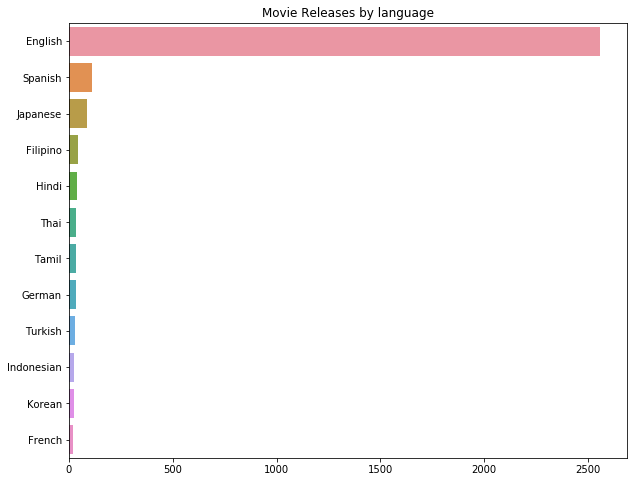

In [201]:
plt.figure(figsize=(10,8))

sns.barplot(x='count', y='language', data=top_languages, orient="h")

plt.xlabel("")
plt.ylabel("")
plt.title("Movie Releases by language")
plt.show()

## count of movie releases over time by country

In [197]:
#horror_movies.head(1)

horror_movies[['release_date', 'release_country']]

#movie_releases

,release_date,release_country
0,26-Oct-12,USA
1,13-Jan-17,USA
2,21-Oct-17,Canada
3,23-Apr-13,USA
4,10-Apr-15,USA
...,...,...
3323,25-Nov-15,USA
3324,9-Oct-15,USA
3325,13-Oct-17,USA
3326,17-Mar-12,Japan


## average movie run time by country

In [4]:
movie_time = horror_movies[['release_country', 'movie_run_time']].dropna()

movie_time.movie_run_time = movie_time.movie_run_time.str.split(pat=" ", expand=True)[0]

movie_time.movie_run_time = pd.to_numeric(movie_time.movie_run_time)

movie_time.groupby('release_country')['movie_run_time'].\
agg(['count', 'mean']).reset_index().sort_values(by='count', ascending=False)

,release_country,count,mean
62,USA,1773,89.080654
61,UK,183,89.191257
25,India,92,122.108696
30,Japan,78,97.307692
43,Philippines,59,94.135593
...,...,...,...
9,Cambodia,1,105.000000
21,Greece,1,73.000000
40,Pakistan,1,82.000000
52,Slovakia,1,94.000000
